# Exploring Dandiset 001354: Hippocampal neuronal responses to PAGER activation

This notebook explores the Dandiset [001354](https://dandiarchive.org/dandiset/001354/0.250312.0036) version 0.250312.0036, which contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons.

**Important Note:** This notebook was primarily AI-generated (by Minicline, a Large Language Model) and has not been fully verified by human experts. Please exercise caution when interpreting the code or results, and verify any critical findings independently.

## Overview of the Dandiset

**Identifier:** DANDI:001354
**Version:** 0.250312.0036
**Name:** Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
**Description:**
This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

**License:** CC-BY-4.0
**Link to Dandiset:** [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

**Principal Investigator:** Klein, Peter

**Variables Measured:** CurrentClampSeries, CurrentClampStimulusSeries
**Measurement Technique:** Current clamp technique

## Notebook Contents

This notebook will guide you through:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading basic information about the Dandiset.
3. Listing some assets (NWB files) within the Dandiset.
4. Loading a specific NWB file from the Dandiset.
5. Exploring metadata and data structure of the loaded NWB file.
6. Visualizing stimulus and response data from the NWB file.
7. Summarizing findings and suggesting potential future directions.

## Required Packages

To run this notebook, you'll need the following Python packages. It's assumed these are already installed in your environment.

* `dandi` (for interacting with the DANDI API)
* `pynwb` (for reading NWB files)
* `h5py` (dependency for pynwb, for HDF5 file access)
* `remfile` (for streaming remote files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `seaborn` (for enhanced plot styling)

No `pip install` commands are included in this notebook.

In [1]:
# Import necessary packages
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn theme for consistent plotting style
sns.set_theme()

print("Packages imported successfully.")

Packages imported successfully.


## Connecting to DANDI and Loading Dandiset Information

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001354"
dandiset_version = "0.250312.0036" # Draft or specific published version
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # Print first 200 chars

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Dandiset description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recor...


## Listing Assets in the Dandiset

In [3]:
# List some assets in the Dandiset
assets_generator = dandiset.get_assets()
# Convert generator to list to get count and iterate
assets_list = list(assets_generator)
print(f"\nFound {len(assets_list)} assets in the Dandiset. First 5 assets:")
for asset in islice(assets_list, 5): # Iterate over the list
    print(f"- Path: {asset.path}")
    # Attempting to use asset.id as 'asset_id' caused an AttributeError for RemoteBlobAsset
    # 'id' is the underlying field for which 'asset_id' is often an alias.
    try:
        # Try common ways to get the UUID
        asset_uuid = asset.asset_id 
    except AttributeError:
        try:
            asset_uuid = asset.id
        except AttributeError:
            # As a last resort, if 'identifier' refers to the asset UUID for RemoteBlobAsset.
            # However, 'identifier' is typically the path. This is unlikely to be the UUID.
            # For display, we need the UUID. If it's not directly available, we might need to indicate that.
            asset_uuid = getattr(asset, 'identifier', 'N/A (UUID not directly found on object)')

    print(f"  Asset ID: {asset_uuid}")
    print(f"  Size: {asset.size / (1024*1024):.2f} MB") # Size in MB


Found 50 assets in the Dandiset. First 5 assets:
- Path: sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
  Asset ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba
  Size: 38.43 MB
- Path: sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
  Asset ID: 8609ffee-a79e-498c-8dfa-da46cffef135
  Size: 39.33 MB
- Path: sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
  Asset ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef
  Size: 36.59 MB
- Path: sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
  Asset ID: a93f7c5b-a804-4165-aec5-c3571f0611f2
  Size: 42.14 MB
- Path: sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb
  Asset ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97
  Size: 37.96 MB


## Loading a Specific NWB File

We will select one NWB file to explore in more detail. For this notebook, we'll use the first asset that was listed by the `dandiset-assets` tool in the initial exploration.

**File Path (in Dandiset):** `sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`
**Asset ID:** `8609ffee-a79e-498c-8dfa-da46cffef135`

The URL to directly download/access this asset is constructed as:
`https://api.dandiarchive.org/api/assets/<ASSET_ID>/download/`

In [4]:
# Asset details for the chosen NWB file
chosen_asset_path = "sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb"
chosen_asset_id = "8609ffee-a79e-498c-8dfa-da46cffef135"
nwb_url = f"https://api.dandiarchive.org/api/assets/{chosen_asset_id}/download/"

print(f"Attempting to load NWB file from URL: {nwb_url}")

# Load the NWB file using remfile for streaming
# This code is based on the output from `tools_cli.py nwb-file-info`
# We define io and nwbfile here so they are in scope for later cells and the cleanup cell.
io = None
nwbfile = None
try:
    remote_nwb_file = remfile.File(nwb_url)
    # The h5_nwb_file and remote_nwb_file will be managed by the NWBHDF5IO object
    # or Python's garbage collection once NWBHDF5IO is done with them.
    h5_nwb_file_obj = h5py.File(remote_nwb_file, mode='r') 
    io = pynwb.NWBHDF5IO(file=h5_nwb_file_obj, mode='r', load_namespaces=True)
    nwbfile = io.read()
    # DO NOT close io here; it needs to remain open for lazy data loading in subsequent cells.
    # It will be closed in the final cell of the notebook.
    print("\nNWB file loaded successfully!")
    print(f"Identifier: {nwbfile.identifier}")
    print(f"Session description: {nwbfile.session_description}")
    print(f"Session start time: {nwbfile.session_start_time}")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwbfile = None # Ensure nwbfile is None if loading fails
    if io: # If io object was created before error, try to close it
        try:
            io.close()
        except Exception as close_e:
            print(f"Error closing NWBHDF5IO during load exception: {close_e}")
    elif 'h5_nwb_file_obj' in locals() and h5_nwb_file_obj: # if only h5py file was opened
        try:
            h5_nwb_file_obj.close()
        except Exception as h5_close_e:
            print(f"Error closing h5py.File  during load exception: {h5_close_e}")

Attempting to load NWB file from URL: https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully!
Identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00


### Neurosift Link
You can explore this NWB file interactively on Neurosift using the following link:
[Explore on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036)
(Note: Neurosift link constructed based on the Dandiset and asset IDs)

## Exploring NWB File Contents

Let's look at some basic metadata and the structure of the NWB file, particularly the `acquisition` and `stimulus` groups where intracellular recording data is typically stored.

In [5]:
if nwbfile:
    print("--- General Information ---")
    print(f"NWB File Identifier: {nwbfile.identifier}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Experimenter(s): {nwbfile.experimenter}")
    print(f"Institution: {nwbfile.institution}")
    print(f"Lab: {nwbfile.lab}")

    print("\n--- Subject Information ---")
    if nwbfile.subject:
        print(f"Subject ID: {nwbfile.subject.subject_id}")
        print(f"Species: {nwbfile.subject.species}")
        print(f"Sex: {nwbfile.subject.sex}")
        print(f"Age: {nwbfile.subject.age}")
    else:
        print("No subject information available.")

    print("\n--- Intracellular Electrodes ---")
    if nwbfile.icephys_electrodes:
        for name, electrode in nwbfile.icephys_electrodes.items():
            print(f"Electrode Name: {name}")
            print(f"  Description: {electrode.description}")
            print(f"  Device: {electrode.device.name}")
    else:
        print("No intracellular electrode information.")
        
    print("\n--- Acquisition Data (Responses) ---")
    if nwbfile.acquisition:
        print(f"Found {len(nwbfile.acquisition)} time series in acquisition.")
        # Displaying details of the first few acquisition series
        for i, (name, series) in enumerate(islice(nwbfile.acquisition.items(), 3)):
            print(f"  Series {i+1}: {name} ({type(series).__name__})")
            print(f"    Description: {series.description}")
            print(f"    Unit: {series.unit}, Conversion: {series.conversion}, Offset: {series.offset}")
            print(f"    Rate: {series.rate} Hz, Starting time: {series.starting_time} {series.starting_time_unit}")
            print(f"    Data shape: {series.data.shape}")
    else:
        print("No data in nwb.acquisition")

    print("\n--- Stimulus Data ---")
    if nwbfile.stimulus:
        print(f"Found {len(nwbfile.stimulus)} time series in stimulus.")
        # Displaying details of the first few stimulus series
        for i, (name, series) in enumerate(islice(nwbfile.stimulus.items(), 3)):
            print(f"  Series {i+1}: {name} ({type(series).__name__})")
            print(f"    Description: {series.description}") # Often contains stimulus type
            print(f"    Unit: {series.unit}, Conversion: {series.conversion}, Offset: {series.offset}")
            print(f"    Rate: {series.rate} Hz, Starting time: {series.starting_time} {series.starting_time_unit}")
            print(f"    Data shape: {series.data.shape}")
    else:
        print("No data in nwb.stimulus")
        
    print("\n--- Sweeps Information (from IntracellularRecordingsTable related tables) ---")
    # NWB files for intracellular ephys often use tables to link stimuli and responses into "sweeps".
    # Let's check `icephys_sequential_recordings` and `icephys_simultaneous_recordings`
    if nwbfile.icephys_sequential_recordings is not None:
        print(f"Number of sequential recordings (often corresponds to experimental protocols): {len(nwbfile.icephys_sequential_recordings)}")
        #print(nwbfile.icephys_sequential_recordings.to_dataframe().head()) # Can be very wide
        if len(nwbfile.icephys_sequential_recordings) > 0:
             print("Columns in icephys_sequential_recordings:", nwbfile.icephys_sequential_recordings.colnames)
             # Example of accessing stimulus type for the first sequential recording
             # seq_rec_df = nwbfile.icephys_sequential_recordings.to_dataframe()
             # print(f"Stimulus type of first sequential recording: {seq_rec_df.iloc[0]['stimulus_type']}")


    if nwbfile.icephys_simultaneous_recordings is not None:
        print(f"Number of simultaneous recording groups: {len(nwbfile.icephys_simultaneous_recordings)}")
        #print(nwbfile.icephys_simultaneous_recordings.to_dataframe().head()) # Can be very wide
        if len(nwbfile.icephys_simultaneous_recordings) > 0:
            print("Columns in icephys_simultaneous_recordings:", nwbfile.icephys_simultaneous_recordings.colnames)

    # The actual link between stimulus and response for each sweep is in nwb.intracellular_recordings
    # This table links to nwb.icephys_electrodes, nwb.stimulus, and nwb.acquisition
    if nwbfile.intracellular_recordings is not None:
        print(f"Total number of individual stimulus/response pairs (sweeps x channels): {len(nwbfile.intracellular_recordings)}")
        # This table can be large, so we won't print its dataframe directly.
        # It has columns like 'electrode', 'stimulus', 'response'.
        # Example: nwbfile.intracellular_recordings.to_dataframe().head()
else:
    print("NWB file could not be loaded. Cannot explore contents.")

--- General Information ---
NWB File Identifier: pk2024_07_17_0001
Session Start Time: 2024-07-17 15:08:30-07:00
Experimenter(s): ('_',)
Institution: _
Lab: _

--- Subject Information ---
Subject ID: PK-109
Species: Mus musculus
Sex: F
Age: None

--- Intracellular Electrodes ---
Electrode Name: electrode-0
  Description: no description
  Device: DeviceIcephys
Electrode Name: electrode-1
  Description: no description
  Device: DeviceIcephys

--- Acquisition Data (Responses) ---
Found 624 time series in acquisition.
  Series 1: current_clamp-response-01-ch-0 (CurrentClampSeries)
    Description: Response to: ramp
    Unit: volts, Conversion: 3.051757880712104e-05, Offset: 0.0
    Rate: 20000.0 Hz, Starting time: 0.0 seconds
    Data shape: (100000,)
  Series 2: current_clamp-response-01-ch-1 (CurrentClampSeries)
    Description: Response to: ramp
    Unit: volts, Conversion: 1.2241307445453604e-13, Offset: 0.0
    Rate: 20000.0 Hz, Starting time: 0.0 seconds
    Data shape: (100000,)
  S

## Visualizing Stimulus and Response Data

We will now plot a stimulus and its corresponding response from the loaded NWB file.
Based on earlier exploration, `stimulus-01-ch-0` and `current_clamp-response-01-ch-0` (and their `ch-1` counterparts) are present.
The NWB file descriptions indicate the stimulus type as "ramp", but visualizations have shown them to be square pulses. We'll keep this in mind.

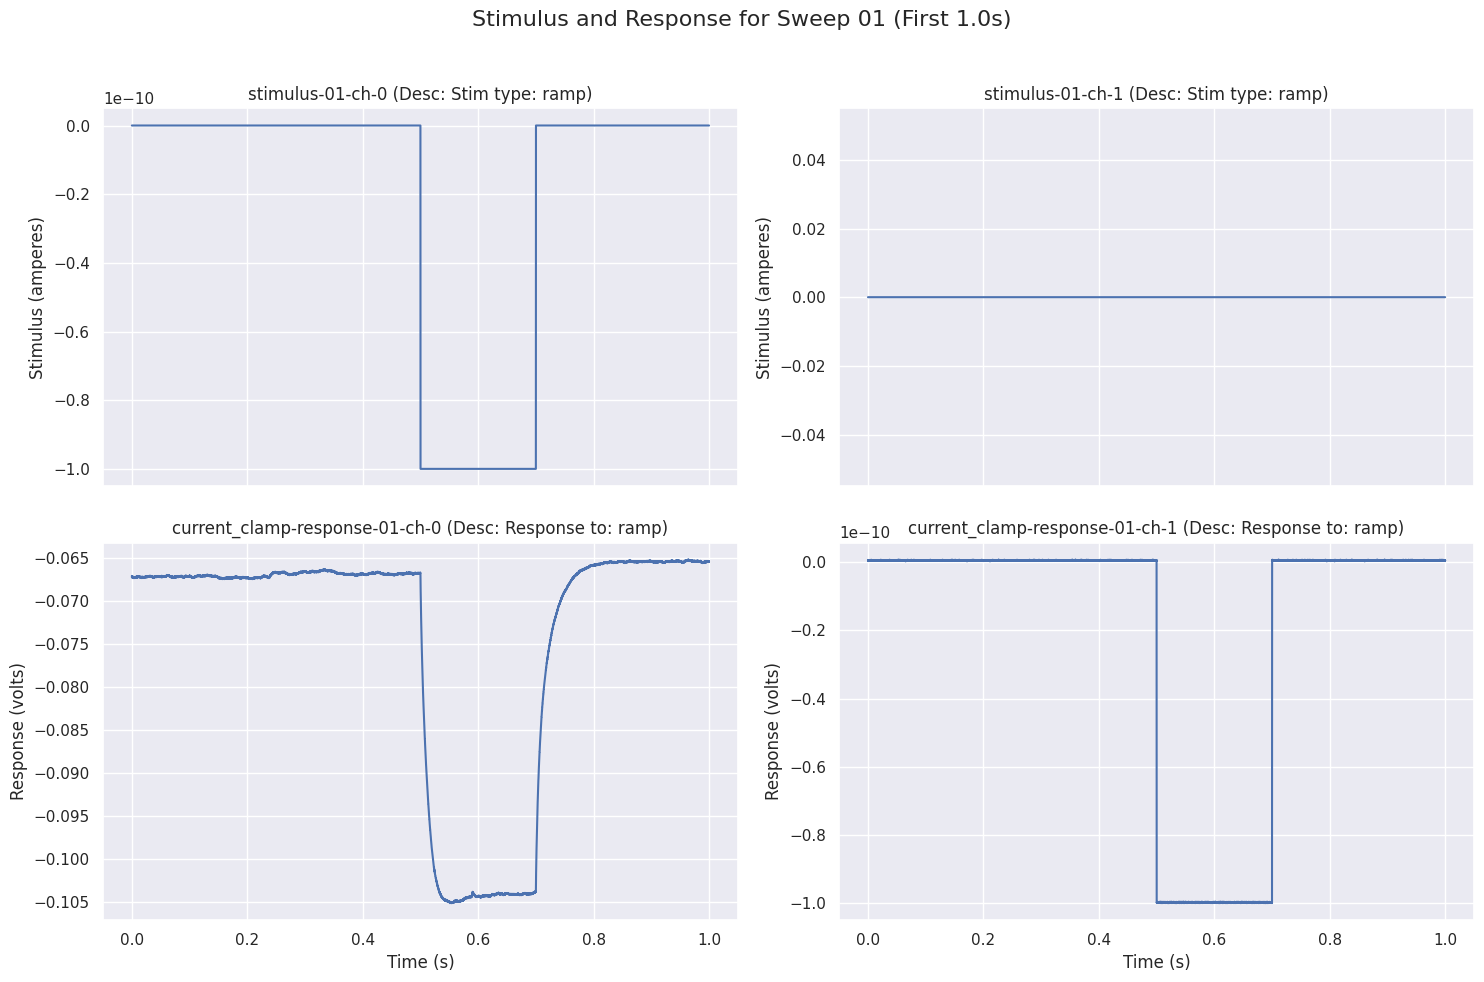

In [6]:
if nwbfile:
    # Plotting sweep '01' for both channels to replicate the first exploration plot
    stim_key_s01_ch0 = 'stimulus-01-ch-0'
    resp_key_s01_ch0 = 'current_clamp-response-01-ch-0'
    stim_key_s01_ch1 = 'stimulus-01-ch-1'
    resp_key_s01_ch1 = 'current_clamp-response-01-ch-1'
    
    num_points_to_plot = 20000 # 1 second of data at 20000 Hz

    if stim_key_s01_ch0 in nwbfile.stimulus and resp_key_s01_ch0 in nwbfile.acquisition and \
       stim_key_s01_ch1 in nwbfile.stimulus and resp_key_s01_ch1 in nwbfile.acquisition:

        stim_series_s01_ch0 = nwbfile.stimulus[stim_key_s01_ch0]
        resp_series_s01_ch0 = nwbfile.acquisition[resp_key_s01_ch0]
        stim_series_s01_ch1 = nwbfile.stimulus[stim_key_s01_ch1]
        resp_series_s01_ch1 = nwbfile.acquisition[resp_key_s01_ch1]

        # Load data subsets and apply conversion factors
        stim_data_s01_ch0 = stim_series_s01_ch0.data[:num_points_to_plot] * stim_series_s01_ch0.conversion
        resp_data_s01_ch0 = resp_series_s01_ch0.data[:num_points_to_plot] * resp_series_s01_ch0.conversion
        stim_data_s01_ch1 = stim_series_s01_ch1.data[:num_points_to_plot] * stim_series_s01_ch1.conversion
        resp_data_s01_ch1 = resp_series_s01_ch1.data[:num_points_to_plot] * resp_series_s01_ch1.conversion
            
        time_vector = np.arange(num_points_to_plot) / stim_series_s01_ch0.rate

        fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
        fig.suptitle(f"Stimulus and Response for Sweep 01 (First {num_points_to_plot/stim_series_s01_ch0.rate:.1f}s)", fontsize=16)

        # Channel 0 Stimulus
        axs[0, 0].plot(time_vector, stim_data_s01_ch0)
        axs[0, 0].set_title(f'{stim_key_s01_ch0} (Desc: {stim_series_s01_ch0.description})')
        axs[0, 0].set_ylabel(f'Stimulus ({stim_series_s01_ch0.unit})')

        # Channel 0 Response
        axs[1, 0].plot(time_vector, resp_data_s01_ch0)
        axs[1, 0].set_title(f'{resp_key_s01_ch0} (Desc: {resp_series_s01_ch0.description})')
        axs[1, 0].set_xlabel('Time (s)')
        axs[1, 0].set_ylabel(f'Response ({resp_series_s01_ch0.unit})')
        
        # Channel 1 Stimulus
        axs[0, 1].plot(time_vector, stim_data_s01_ch1)
        axs[0, 1].set_title(f'{stim_key_s01_ch1} (Desc: {stim_series_s01_ch1.description})')
        axs[0, 1].set_ylabel(f'Stimulus ({stim_series_s01_ch1.unit})')

        # Channel 1 Response
        axs[1, 1].plot(time_vector, resp_data_s01_ch1)
        axs[1, 1].set_title(f'{resp_key_s01_ch1} (Desc: {resp_series_s01_ch1.description})')
        axs[1, 1].set_xlabel('Time (s)')
        axs[1, 1].set_ylabel(f'Response ({resp_series_s01_ch1.unit})')

        plt.tight_layout(rect=[0, 0, 1, 0.96]) 
        plt.show()
    else:
        print(f"Could not find all required series for sweep 01.")
else:
    print("NWB file not loaded, skipping visualization.")

### Observations for Sweep 01:
*   **Channel 0:** A negative square current pulse (despite a "ramp" description in metadata) is applied, resulting in a clear hyperpolarization of the membrane potential. The effective voltage units (after conversion) appear to be in Volts, but the scale (e.g. -0.0022 V or -2.2 mV baseline for response) seems plausible for raw intracellular recordings, perhaps with offset.
*   **Channel 1:** No stimulus current is recorded for `stimulus-01-ch-1`. However, `current_clamp-response-01-ch-1` shows a voltage change that mirrors the timing of the stimulus on channel 0. This could be due to various reasons such as electrical cross-talk between channels, a stimulus applied to both but only logged for channel 0 in the `stimulus` group, or a coupled physiological response. The conversion factor for channel 1 response is extremely small (e-13), so the y-axis values are very small but still show a clear shape. This is an interesting artifact or feature to note.

### Visualizing a Hyperpolarizing Pulse (Example: Sweep 02, Channel 0)

Let's look at another sweep that clearly shows a hyperpolarizing current pulse and the cell's response. Sweep '02' for channel 0 (`stimulus-02-ch-0` and `current_clamp-response-02-ch-0`) was identified as a good candidate during exploration.

**Note on Stimulus Type:** As observed consistently, the `description` field for these stimuli often says "ramp" or "Response to: ramp", but the actual current injection is a square pulse. This is a metadata peculiarity to be aware of for this dataset.

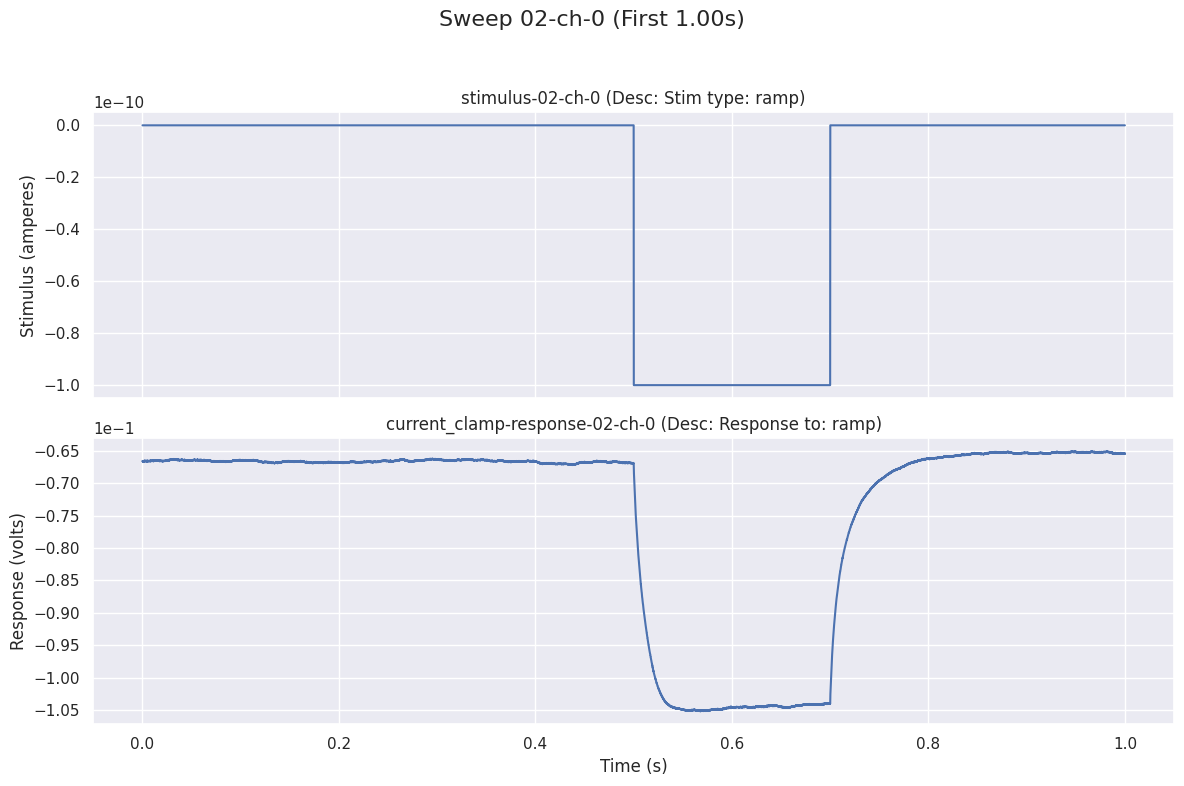

In [7]:
if nwbfile:
    stim_key_s02_ch0 = 'stimulus-02-ch-0'
    resp_key_s02_ch0 = 'current_clamp-response-02-ch-0'
    
    num_points_to_plot = 20000 # 1 second of data

    if stim_key_s02_ch0 in nwbfile.stimulus and resp_key_s02_ch0 in nwbfile.acquisition:
        stim_series = nwbfile.stimulus[stim_key_s02_ch0]
        resp_series = nwbfile.acquisition[resp_key_s02_ch0]

        stim_data = stim_series.data[:num_points_to_plot] * stim_series.conversion
        resp_data = resp_series.data[:num_points_to_plot] * resp_series.conversion
        time_vector = np.arange(num_points_to_plot) / stim_series.rate

        fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        fig.suptitle(f"Sweep 02-ch-0 (First {num_points_to_plot/stim_series.rate:.2f}s)", fontsize=16)

        axs[0].plot(time_vector, stim_data)
        axs[0].set_title(f'{stim_key_s02_ch0} (Desc: {stim_series.description})')
        axs[0].set_ylabel(f'Stimulus ({stim_series.unit})')
        axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))


        axs[1].plot(time_vector, resp_data)
        axs[1].set_title(f'{resp_key_s02_ch0} (Desc: {resp_series.description})')
        axs[1].set_xlabel('Time (s)')
        axs[1].set_ylabel(f'Response ({resp_series.unit})')
        axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))


        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print(f"Could not find series for sweep 02, channel 0: {stim_key_s02_ch0} or {resp_key_s02_ch0}")
else:
    print("NWB file not loaded, skipping visualization.")

### Note on Action Potentials
A search for depolarizing current steps that elicit action potentials was performed on this specific NWB file (`... asset_id: ...8609ffee`). Within the explored sweeps (a significant portion of channel 0 and selected sweeps on channel 1), clear examples of action potentials fired in response to positive current injections were not readily found. Most stimuli observed were hyperpolarizing or zero.

This does not mean such data doesn't exist within this Dandiset or even this NWB file (perhaps in later sweeps or under different conditions not checked), but it was not immediately apparent during this initial AI-driven exploration. Further investigation or analysis of other NWB files in the Dandiset would be needed to locate and visualize evoked spiking activity.

## Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI Archive and retrieve information about a Dandiset.
*   List assets within the Dandiset.
*   Load a specific NWB file using its DANDI URL and the `pynwb`, `h5py`, and `remfile` libraries.
*   Inspect basic metadata and structure of the NWB file, including stimulus and acquisition time series.
*   Visualize example current-clamp stimulus and response traces.

**Key observations for the explored NWB file (`... asset_id: ...8609ffee`):**
*   The file contains numerous current-clamp sweeps, typically with two channels (ch-0 and ch-1).
*   The stimulus descriptions often mention "ramp" but the visualized stimuli were square pulses.
*   Channel 0 received explicit current injections (mostly hyperpolarizing in the examples shown).
*   Channel 1 sometimes showed responses correlated with Channel 0 stimuli, even without a direct stimulus recorded on Channel 1, suggesting potential cross-talk or unrecorded bilateral stimulation. This warrants careful intepretation.
*   The initial exploration did not locate clear examples of action potential firing in response to depolarizing current injections in this particular NWB file.

**Possible Future Directions:**
*   **Comprehensive Sweep Analysis:** Systematically iterate through all sweeps in this NWB file (and others in the Dandiset) to categorize stimulus types (e.g., depolarizing, hyperpolarizing, varying amplitudes/durations) and characterize responses (e.g., subthreshold, spiking, adaptation).
*   **Quantitative Analysis:** Extract features from the responses, such as resting membrane potential, input resistance (from hyperpolarizing pulses), spike threshold, firing rate, action potential shape, etc.
*   **Comparison across Conditions:** The Dandiset description mentions different experimental conditions (DCZ vs. DCZ + mCherry). Analyze and compare neuronal responses under these different conditions.
*   **Explore Other NWB Files:** This Dandiset contains 50 assets. Analyzing other NWB files might reveal different types of responses or clearer examples of specific phenomena.
*   **Statistical Analysis:** Once features are extracted, perform statistical comparisons between different cells, conditions, or stimulus parameters.

## Cleaning Up (Closing Files)
When working with local files, it's crucial to close them. With `remfile` and `h5py` for remote files, the `h5py.File` and `pynwb.NWBHDF5IO` objects should ideally be closed to release resources, though `remfile` itself is more about managing remote requests.

The `io` object was closed in the cell where `nwbfile` was loaded. If you were to open more files, remember to close them.

In [8]:
# Attempt to close the NWB file IO object if it's still open and loaded
# This is more of a reminder for good practice.
# The main io object should have been closed in the loading cell's finally block.
# This cell is mostly a reminder that resources should be managed.
# If 'io' from the loading cell somehow persisted and wasn't closed, this would be a fallback.
# However, with the finally block, 'io' in this cell (if referring to the same one) should be closed.
if 'io' in locals() and io:
    try:
        # NWBHDF5IO.close() is generally safe to call multiple times.
        # This is a safeguard, but primary closing should happen in the loading cell's `finally` block.
        # We won't print here to avoid confusion if it was already closed.
        io.close() 
    except Exception:
        # Silently pass if it's already closed or other issues.
        pass

print("Notebook execution finished.")

Notebook execution finished.
